In [1]:
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

In [2]:
datasets = read_data_sets('./')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import gzip
import numpy
from tensorflow.python.platform import gfile

In [4]:
TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

def _read32(bytestream):
  dt = numpy.dtype(numpy.uint32).newbyteorder('>')
  return numpy.frombuffer(bytestream.read(4), dtype=dt)[0]

def extract_images(f):
  """Extract the images into a 4D uint8 numpy array [index, y, x, depth].

  Args:
    f: A file object that can be passed into a gzip reader.

  Returns:
    data: A 4D uint8 numpy array [index, y, x, depth].

  Raises:
    ValueError: If the bytestream does not start with 2051.

  """
  print('Extracting', f.name)
  with gzip.GzipFile(fileobj=f) as bytestream:
    magic = _read32(bytestream)
    if magic != 2051:
      raise ValueError('Invalid magic number %d in MNIST image file: %s' %
                       (magic, f.name))
    num_images = _read32(bytestream)
    rows = _read32(bytestream)
    cols = _read32(bytestream)
    buf = bytestream.read(rows * cols * num_images)
    data = numpy.frombuffer(buf, dtype=numpy.uint8)
    data = data.reshape(num_images, rows, cols, 1)
    return data

def extract_labels(f, one_hot=False, num_classes=10):
  """Extract the labels into a 1D uint8 numpy array [index].

  Args:
    f: A file object that can be passed into a gzip reader.
    one_hot: Does one hot encoding for the result.
    num_classes: Number of classes for the one hot encoding.

  Returns:
    labels: a 1D uint8 numpy array.

  Raises:
    ValueError: If the bystream doesn't start with 2049.
  """
  print('Extracting', f.name)
  with gzip.GzipFile(fileobj=f) as bytestream:
    magic = _read32(bytestream)
    if magic != 2049:
      raise ValueError('Invalid magic number %d in MNIST label file: %s' %
                       (magic, f.name))
    num_items = _read32(bytestream)
    buf = bytestream.read(num_items)
    labels = numpy.frombuffer(buf, dtype=numpy.uint8)
    if one_hot:
      return dense_to_one_hot(labels, num_classes)
    return labels

with gfile.Open(TRAIN_IMAGES, 'rb') as f:
    train_images = extract_images(f)

with gfile.Open(TRAIN_LABELS, 'rb') as f:
    train_labels = extract_labels(f)

('Extracting', 'train-images-idx3-ubyte.gz')
('Extracting', 'train-labels-idx1-ubyte.gz')


In [5]:
train_images.shape

(60000, 28, 28, 1)

In [6]:
train_images[5,:,:,0].shape

(28, 28)

In [7]:
train_labels.shape

(60000,)

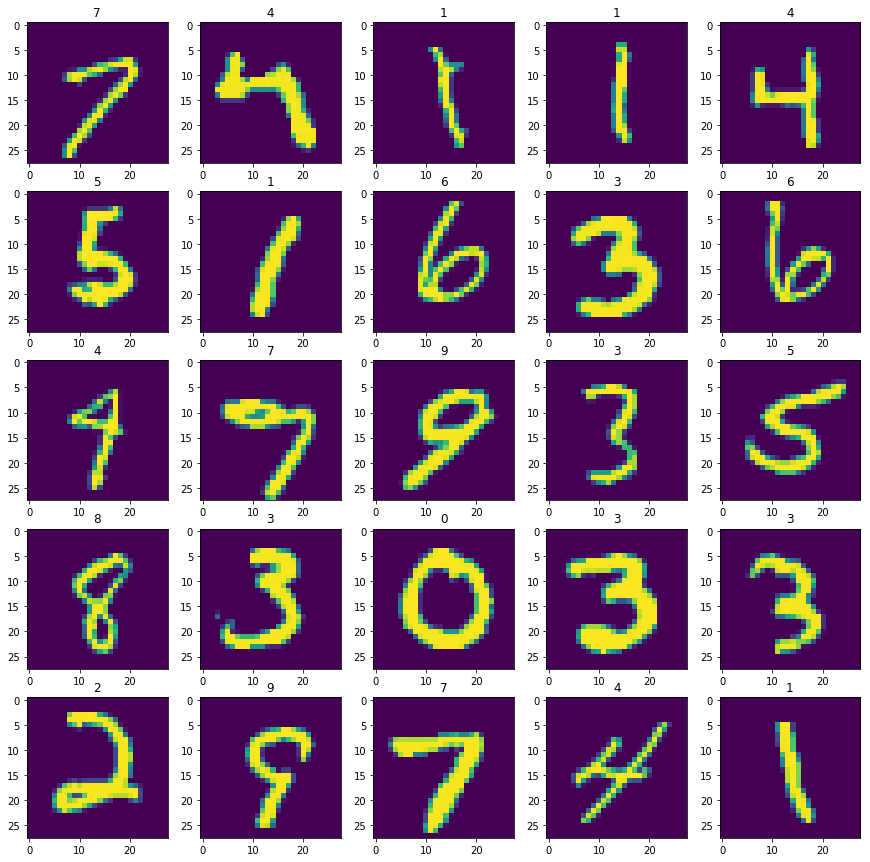

In [18]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 5

for i in range(1, columns*rows +1):
    idx = numpy.random.randint(train_images.shape[0])
    img = train_images[idx,:,:,0]
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img)
#     ax.axis('off')
    ax.title.set_text(train_labels[idx])
#     ax.title(train_labels[idx])
plt.show()